In [1]:
from instagrapi import Client

cl = Client()
cl.login('sophiakhan694', 'flowerpower4589')

user_id = cl.user_id_from_username('sophiakhan694')
medias = cl.user_medias(user_id, 20)

PleaseWaitFewMinutes: Please wait a few minutes before you try again.

In [4]:
from instagrapi.mixins.comment import ClientNotFoundError
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException


# Your Instagram username and password
USERNAME = 'your_username'
PASSWORD = 'your_password'

# Function to login to Instagram
def login(username, password):
    # Set up Chrome options for headless mode
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enable headless mode
    chrome_options.add_argument("--window-size=1920x1080")

    # Initialize Chrome driver
    driver = webdriver.Chrome(options=chrome_options)

    # Go to Instagram login page
    driver.get("https://www.instagram.com/accounts/login/")

    # Wait for page to load
    time.sleep(2)

    # Fill in username and password
    username_input = driver.find_element(By.CSS_SELECTOR, "input[name='username']")
    username_input.send_keys(username)
    
    password_input = driver.find_element(By.CSS_SELECTOR, "input[name='password']")
    password_input.send_keys(password)

    # Click login button
    login_button = driver.find_element(By.CSS_SELECTOR, "button[type='submit']")
    login_button.click()

    # Wait for login process to complete
    try:
        # Wait up to 10 seconds for the page to load after login
        WebDriverWait(driver, 10).until(
            EC.url_contains("instagram.com")
        )
        print("Login successful.")
    except TimeoutException:
        print("Login failed.")
        driver.quit()
        return None

    return driver

# Function to navigate to Explore page after login
def navigate_to_explore(driver):
    # Click on the Explore button
    try:
        # Wait up to 10 seconds for the Explore button to be clickable
        explore_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//a[contains(@href,'/explore/')]"))
        )
        print("Explore button found. Clicking...")
        
         # Click on the Explore button
        explore_button.click()
        
        # Wait up to 10 seconds for the page to load
        WebDriverWait(driver, 10).until(
            EC.url_contains("/explore/")
        )
        print("Navigated to Explore page successfully.")
        
    except TimeoutException:
        print("Timeout occurred. Failed to navigate to the Explore page.")
        driver.quit()
        return None

    return driver


# Function to scrape hashtags from Explore page
# def scrape_hashtags(driver):
#     # Find all hashtags on the page
#     hashtags = driver.find_elements(By.XPATH, "//a[contains(@href, '/explore/tags/')]")
#     hashtags = [tag.text for tag in hashtags]
#     print(hashtags)
#     return hashtags
def scrape_posts(driver, hashtag_name, max_posts=10):
    # Define the hashtag you want to search for
    #hashtag_name = 'freegaza'

    # Specify the number of top posts you want to retrieve
    amount = 18

    try:
        # Retrieve the top posts by the hashtag
        top_posts = cl.hashtag_medias_top(hashtag_name, amount)

        # Initialize a list to store post information
        posts_info = []

        # Extract PK (Post ID), likes, and comments information from top posts
        for post in top_posts:
            pk = post.pk
            likes = post.like_count
            comments = post.comment_count
            posts_info.append({'pk': pk, 'likes': likes, 'comments': comments})

        print("Number of top posts retrieved:", len(posts_info))

        return posts_info
    
    except ClientNotFoundError as e:
        print("Error:", e)
        return []






# Main function
def main():
    # Login to Instagram
    driver = login('sophiakhan694', 'flowerpower4589')
    if driver is None:
        return

    # Navigate to Explore page after login
    print("here1")
    driver = navigate_to_explore(driver)
    
    if driver is None:
        return

    # Scrape hashtags from Explore page
    print("here2")
    print("Scraping posts from Explore page...")
    freegaza_posts = scrape_posts(driver, 'freegaza', max_posts=10)
    # freepalestine_posts = scrape_posts(driver, ' freepalestine', max_posts=10)
    # savegaza_posts  = scrape_posts(driver, ' savegaza', max_posts=10)
    # palestinianlivesmatter_posts  = scrape_posts(driver, ' palestinianlivesmatter', max_posts=10)
    #print(posts)
    # Print the posts
    # for post in posts:
    #     print("Caption:", post['caption'])
    #     print("Likes:", post['likes'])
    #     print("Comments:", post['comments'])
    #     print("User:", post['user'])
    #     print("Location:", post['location'])
    #     print("-----")

    # Close the browser
    driver.quit()

if __name__ == "__main__":
    main()

Login successful.
here1
Explore button found. Clicking...
Navigated to Explore page successfully.
here2
Scraping posts from Explore page...


LoginRequired: login_required

In [14]:
import pandas as pd

# Raw data
raw_data = {
    'freepalestine': [(332, 25), (1837, 161), (5392, 29), (3902, 144), (712, 3)],
    'freegaza': [(1244, 5), (1436, 6), (710, 0), (721, 15), (2496, 115)],
    'savegaza': [(369, 10), (39200, 513), (83700, 1468), (11200, 33), (1313, 29)],
    'palestinianlivesmatter': [(2, 0), (5, 0), (4559, 208), (3407, 207), (962, 43)]
}

# Convert to DataFrame
df = pd.DataFrame(raw_data)
df.columns = ['freepalestine', 'freegaza', 'savegaza', 'palestinianlivesmatter']
df.index = ['post1', 'post2', 'post3', 'post4', 'post5']

# Split likes and comments into separate columns
df[['freepalestine_likes', 'freepalestine_comments']] = pd.DataFrame(df['freepalestine'].tolist(), index=df.index)
df[['freegaza_likes', 'freegaza_comments']] = pd.DataFrame(df['freegaza'].tolist(), index=df.index)
df[['savegaza_likes', 'savegaza_comments']] = pd.DataFrame(df['savegaza'].tolist(), index=df.index)
df[['palestinianlivesmatter_likes', 'palestinianlivesmatter_comments']] = pd.DataFrame(df['palestinianlivesmatter'].tolist(), index=df.index)

# Drop the original columns
df.drop(['freepalestine', 'freegaza', 'savegaza', 'palestinianlivesmatter'], axis=1, inplace=True)

# Display the DataFrame
print(df)


       freepalestine_likes  freepalestine_comments  freegaza_likes  \
post1                  332                      25            1244   
post2                 1837                     161            1436   
post3                 5392                      29             710   
post4                 3902                     144             721   
post5                  712                       3            2496   

       freegaza_comments  savegaza_likes  savegaza_comments  \
post1                  5             369                 10   
post2                  6           39200                513   
post3                  0           83700               1468   
post4                 15           11200                 33   
post5                115            1313                 29   

       palestinianlivesmatter_likes  palestinianlivesmatter_comments  
post1                             2                                0  
post2                             5                       

In [15]:
# Calculate average likes and comments for each hashtag
avg_likes = df.mean().filter(like='_likes')
avg_comments = df.mean().filter(like='_comments')

# Display average likes and comments
print("\nAverage Likes per Hashtag:")
print(avg_likes)
print("\nAverage Comments per Hashtag:")
print(avg_comments)



Average Likes per Hashtag:
freepalestine_likes              2435.0
freegaza_likes                   1321.4
savegaza_likes                  27156.4
palestinianlivesmatter_likes     1787.0
dtype: float64

Average Comments per Hashtag:
freepalestine_comments              72.4
freegaza_comments                   28.2
savegaza_comments                  410.6
palestinianlivesmatter_comments     91.6
dtype: float64


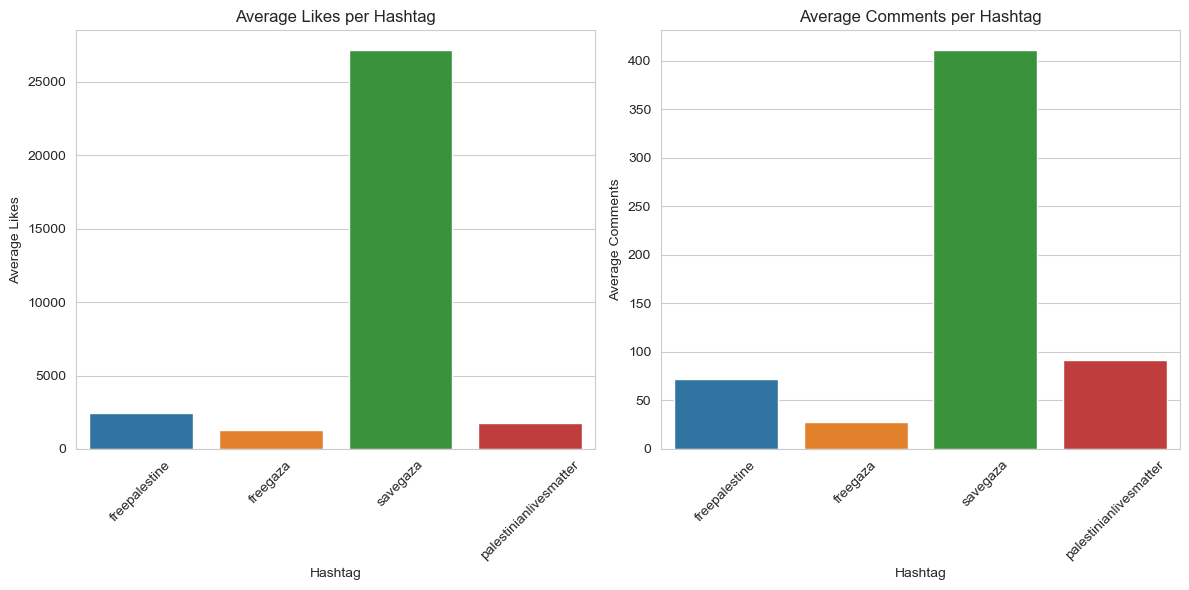

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot average likes
sns.barplot(x=avg_likes.index.str.replace('_likes', ''), y=avg_likes.values, ax=axes[0])
axes[0].set_title('Average Likes per Hashtag')
axes[0].set_xlabel('Hashtag')
axes[0].set_ylabel('Average Likes')

# Plot average comments
sns.barplot(x=avg_comments.index.str.replace('_comments', ''), y=avg_comments.values, ax=axes[1])
axes[1].set_title('Average Comments per Hashtag')
axes[1].set_xlabel('Hashtag')
axes[1].set_ylabel('Average Comments')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Table of Average Likes and Comments:
                   Average Likes  Average Comments
istandwithisrael          1100.6              28.2
proisrael                  524.2              17.8
freegazafromhamas         1258.2              67.0
hamasisisis               2909.2             298.0


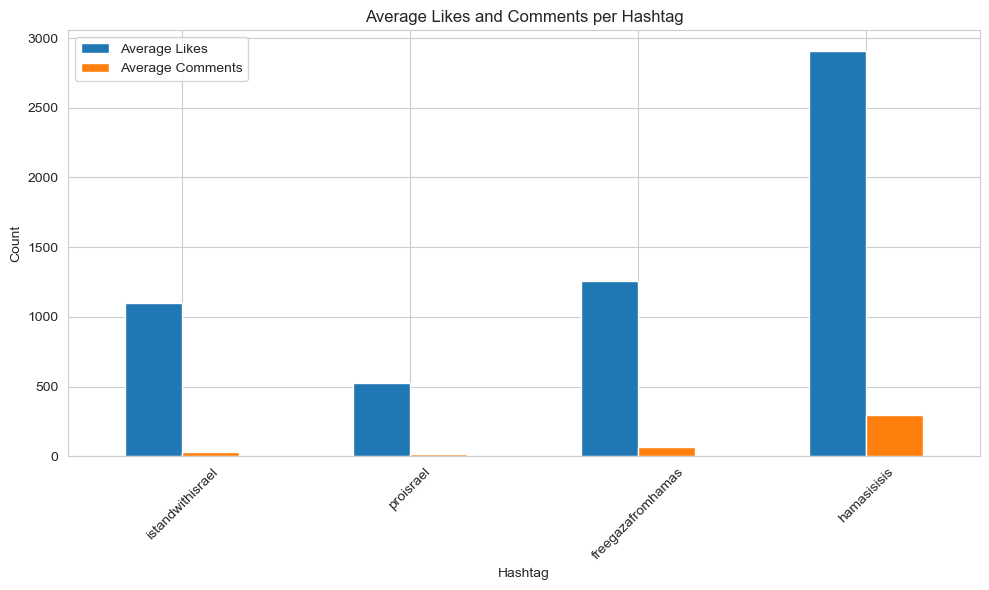

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for hashtags
data = {
    'istandwithisrael': [(645, 47), (603, 20), (2620, 58), (799, 8), (836, 8)],
    'proisrael': [(48, 4), (995, 30), (23, 0), (584, 44), (971, 11)],
    'freegazafromhamas': [(24, 4), (1443, 110), (826, 8), (699, 104), (3299, 109)],
    'hamasisisis': [(4710, 841), (604, 24), (1578, 192), (5565, 109), (2089, 324)]
}

# Calculate averages
averages = {}
for hashtag, values in data.items():
    likes = [like for like, _ in values]
    comments = [comment for _, comment in values]
    avg_likes = sum(likes) / len(likes)
    avg_comments = sum(comments) / len(comments)
    averages[hashtag] = {'Average Likes': avg_likes, 'Average Comments': avg_comments}

# Create DataFrame
df = pd.DataFrame(averages).transpose()

# Print table
print("Table of Average Likes and Comments:")
print(df)

# Plot graph
df.plot(kind='bar', figsize=(10, 6))
plt.title('Average Likes and Comments per Hashtag')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comparison of Average Likes and Comments between proisrael and palestinianlivesmatter:
                        Average Likes  Average Comments
proisrael                       524.2              17.8
palestinianlivesmatter         1787.0              91.6


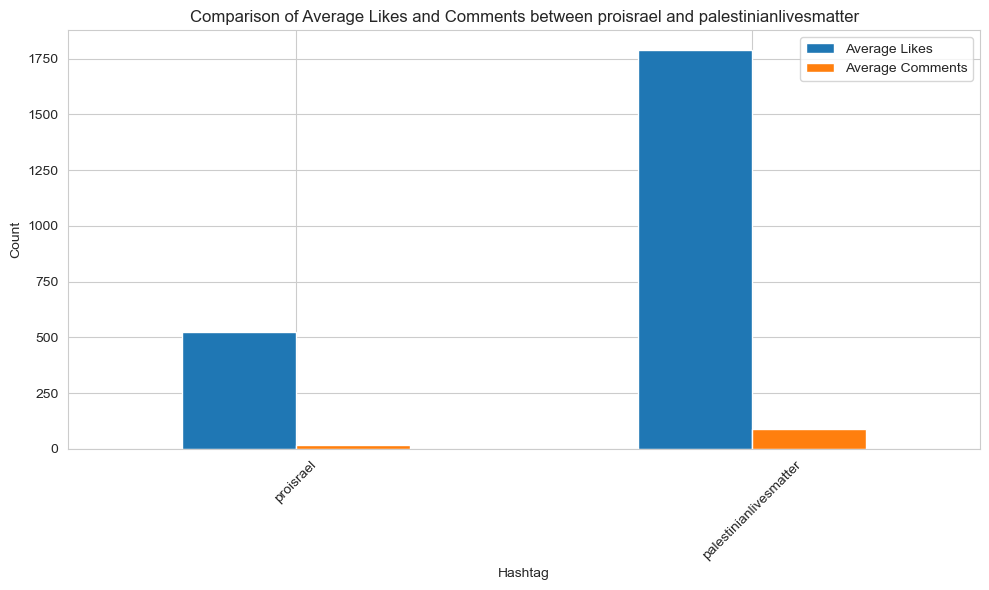

In [8]:
# Data for proisrael and palestinianlivesmatter hashtags
data = {
    'proisrael': [(48, 4), (995, 30), (23, 0), (584, 44), (971, 11)],
    'palestinianlivesmatter': [(2, 0), (5, 0), (4559, 208), (3407, 207), (962, 43)]
}

# Calculate averages
averages = {}
for hashtag, values in data.items():
    likes = [like for like, _ in values]
    comments = [comment for _, comment in values]
    avg_likes = sum(likes) / len(likes)
    avg_comments = sum(comments) / len(comments)
    averages[hashtag] = {'Average Likes': avg_likes, 'Average Comments': avg_comments}

# Create DataFrame
df_comparison = pd.DataFrame(averages).transpose()

# Print comparison table
print("Comparison of Average Likes and Comments between proisrael and palestinianlivesmatter:")
print(df_comparison)

# Plot comparison graph
df_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Average Likes and Comments between proisrael and palestinianlivesmatter')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
